#### Assignment 1
## Marketing Campaign Strategy Analysis 
Purpose: Inform media campaign strategy with an analysis of ad spend by media channels and their effect on sales. Identify the most effective ad spend and the relative effect on sales of each media channel.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Exploratory Data Analysis

In [2]:
df = pd.read_csv('Marketing.csv')

In [3]:
df.head()

,TV,radio,newspaper,Google,Facebook,Linkedin,sales
0,230.1,37.8,69.2,267.9,160.9,107.0,22.1
1,44.5,39.3,45.1,83.8,-0.6,84.4,10.4
2,17.2,45.9,69.3,63.1,-52.1,115.2,9.3
3,151.5,41.3,58.5,192.8,93.0,99.8,18.5
4,180.8,10.8,58.4,191.6,122.4,69.2,12.9


In [7]:
df.shape

(200, 7)

In [5]:
df.isnull().any()

TV           False
radio        False
newspaper    False
Google       False
Facebook     False
Linkedin     False
sales        False
dtype: bool

In [11]:
df.duplicated().value_counts()

False    200
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   Google     200 non-null    float64
 4   Facebook   200 non-null    float64
 5   Linkedin   200 non-null    float64
 6   sales      200 non-null    float64
dtypes: float64(7)
memory usage: 11.1 KB


In [7]:
df.describe()

,TV,radio,newspaper,Google,Facebook,Linkedin,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,170.306500,116.488500,53.818000,14.022500
std,85.854236,14.846809,21.778621,87.926689,87.369442,30.392927,5.217457
min,0.700000,0.000000,0.300000,10.700000,-72.500000,3.100000,1.600000
25%,74.375000,9.975000,12.750000,90.625000,42.575000,30.875000,10.375000
50%,149.750000,22.900000,25.750000,175.550000,124.450000,46.400000,12.900000
75%,218.825000,36.525000,45.100000,243.300000,183.900000,73.950000,17.400000
max,296.400000,49.600000,114.000000,332.700000,291.800000,150.600000,27.000000


In [13]:
import sweetviz as sv
data_report = sv.analyze(df)
data_report.show_html('Marketing_Data_Report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Marketing_Data_Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


#### Ad Spend Box Plots and Outlier Analysis

<AxesSubplot:>

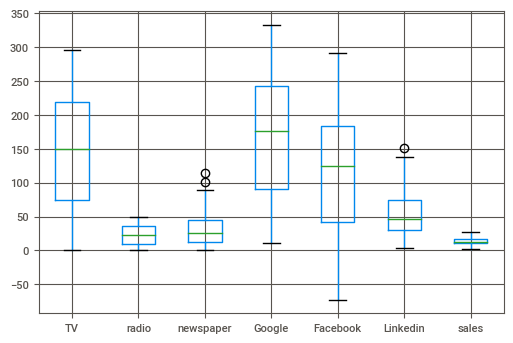

In [18]:
df.boxplot()

In [24]:
from scipy import stats

In [29]:
iqr_newspaper = stats.iqr(df['newspaper'])
print(np.where(max(df['newspaper']) > 45.1 + 1.5*iqr_newspaper))

(array([0]),)


In [31]:
iqr_LinkedIn = stats.iqr(df['Linkedin'])
print(np.where(max(df['Linkedin']) > 73.95 + 1.5*iqr_LinkedIn))

(array([0]),)


## Machine Learning Models


#### 1. Linear Regression with OLS

In [14]:
X = df.drop(columns = 'sales')
X.head()

,TV,radio,newspaper,Google,Facebook,Linkedin
0,230.1,37.8,69.2,267.9,160.9,107.0
1,44.5,39.3,45.1,83.8,-0.6,84.4
2,17.2,45.9,69.3,63.1,-52.1,115.2
3,151.5,41.3,58.5,192.8,93.0,99.8
4,180.8,10.8,58.4,191.6,122.4,69.2


In [10]:
y = df['sales']
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [16]:
from sklearn.linear_model import LinearRegression

In [23]:
lr = LinearRegression()

In [24]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
y_pred = lr.predict(X_test)

In [26]:
lr_trn_score = lr.score(X_train, y_train)
lr_tst_score = lr.score(X_test, y_test)
print("Training set score: {:.2f}".format(lr_trn_score))
print("Test set score: {:.2f}".format(lr_tst_score))

Training set score: 0.91
Test set score: 0.86


#### 2. Ridge Regression

In [28]:
from sklearn.linear_model import Ridge

In [34]:
rr = Ridge(alpha=1.0).fit(X_train,y_train)

In [35]:
rr_pred = rr.predict(X_test)

In [36]:
rr_trn_score = rr.score(X_train, y_train)
rr_tst_score = rr.score(X_test, y_test)
print("Training set score: {:.2f}".format(rr_trn_score))
print("Test set score: {:.2f}".format(rr_tst_score))

Training set score: 0.91
Test set score: 0.86


#### 3. Lasso Regression

In [37]:
from sklearn.linear_model import Lasso

In [38]:
lsr = Lasso(alpha=1.0).fit(X_train, y_train)

In [39]:
lsr_pred = lsr.predict(X_test)

In [40]:
lsr_trn_score = lsr.score(X_train, y_train)
lsr_tst_score = lsr.score(X_test, y_test)
print("Training set score: {:.2f}".format(lsr_trn_score))
print("Test set score: {:.2f}".format(lsr_tst_score))

Training set score: 0.91
Test set score: 0.86


#### Regression Scores

In [43]:
report = pd.DataFrame({
    'Train': [lr_trn_score,rr_trn_score,lsr_trn_score],
    'Test': [lr_tst_score, rr_tst_score,lsr_tst_score]
}, index = ['Linear','Ridge','Lasso'])
report

,Train,Test
Linear,0.906772,0.859185
Ridge,0.907218,0.857641
Lasso,0.907028,0.860356


#### Regression Coefficients

In [44]:
lsr.coef_

array([-0.        ,  0.14758907,  0.        ,  0.04417494, -0.        ,
        0.00223445])

In [56]:
features = []
for col in df.columns:
    features.append(col)
features[:-1]

['TV', 'radio', 'newspaper', 'Google', 'Facebook', 'Linkedin']

In [57]:
coefs = pd.DataFrame({
    'Linear':lr.coef_,
    'Ridge':rr.coef_,
    'Lasso':lsr.coef_
}, index = features[:-1])
coefs['Max'] = 

,Linear,Ridge,Lasso
TV,1.849960e+12,-0.027378,-0.000000
radio,5.501745e+11,0.088169,0.147589
newspaper,-1.299785e+12,-0.038128,0.000000
Google,2.421299e+11,0.060791,0.044175
Facebook,-2.092090e+12,0.010750,-0.000000
Linkedin,-7.923044e+11,0.050041,0.002234


In [62]:
print('Intercepts:')
print('Linear',lr.intercept_)
print('Ridge',rr.intercept_)
print('Lasso',lsr.intercept_)

Intercepts:
Linear 2.7732083333333346
Ridge 2.892604313485789
Lasso 2.975138982418553


#### Optimization through Ensemble Learning

In [ ]:
#Is it possible to generalize better by combining the findings? 